In [1]:
# Importing basic Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading and Sorting the given excel data

In [25]:
air_pol = 'C:\\Users\\vishw\\Downloads\\Delhi .xlsx'
data=pd.read_excel(air_pol)
data.head(5)

,#Data,Unnamed: 1
0,#Attribution: IMD - India Meteorological Depar...,NaN
1,date,pm25
2,2018-04-20 00:00:00,92
3,2018-04-19 23:00:00,89
4,2018-04-19 22:00:00,75


In [3]:
# Given excel contains some unwanted data with wrong columns name
# Removing the unwanted data and rearrnage the columns
data1=pd.read_excel(air_pol, header=2, usecols=['date','pm25'], date_parser='date')
data1.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [4]:
# Data given above is not sorted hence sorting (Time stamp) of data is imported in Forecasting
data1.sort_values(by='date',inplace=True)
data1.head()

,date,pm25
2373,2018-01-01 00:00:00,423
2372,2018-01-01 01:00:00,414
2371,2018-01-01 02:00:00,417
2370,2018-01-01 03:00:00,466
2369,2018-01-01 04:00:00,470


In [5]:
# Resetting Index
data1.reset_index(drop=True,inplace=True)
data1.head()

,date,pm25
0,2018-01-01 00:00:00,423
1,2018-01-01 01:00:00,414
2,2018-01-01 02:00:00,417
3,2018-01-01 03:00:00,466
4,2018-01-01 04:00:00,470


In [6]:
# data types are in string(object) formate 
data1.dtypes

date    datetime64[ns]
pm25            object
dtype: object

In [7]:
# Crosschecking the column names
col=list(data1.columns)
col

['date', 'pm25']

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2374 non-null   datetime64[ns]
 1   pm25    2374 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 37.2+ KB


### Exploratory Data Analysis (EDA part)

Finding and Replacing the Null Values using fillna() command

In [10]:
data1.isna().sum()

date    0
pm25    0
dtype: int64

In [11]:
data1.nunique()

date    2374
pm25     436
dtype: int64

In [12]:
print(data1['pm25'].unique())

[423 414 417 466 470 449 404 380 371 332 336 382 411 426 420 330 320 301
 386 480 472 444 438 448 492 446 341 342 337 362 384 394 364 350 348 367
 365 351 333 357 356 445 439 360 324 346 321 311 310 316 300 338 359 343
 334 375 361 393 315 373 329 143 150 171 170 204 178 158 190 305 325 399
 388 345 416 387 376 409 437 391 353 326 335 323 319 354 294 379 358 368
 412 410 241 327 318 398 415 250 245 322 403 452 431 370 308 169 225 260
 242 79 58 77 76 86 106 374 349 344 355 340 289 280 339 317 224 65 55 94
 82 83 120 235 397 407 422 471 425 389 328 313 372 229 130 131 155 230 295
 307 377 369 401 298 309 312 237 126 134 103 211 347 390 363 314 279 278
 145 117 122 80 73 161 244 286 256 254 223 236 240 139 164 67 151 207 215
 402 392 352 395 400 381 189 175 124 272 140 97 194 413 405 433 166 293
 261 304 188 162 104 75 87 163 202 303 430 331 159 14 30 54 57 266 262 195
 226 180 259 264 114 265 165 90 101 85 98 136 263 288 378 383 419 220 198
 238 486 478 443 440 267 246 418 455 435 306 5

In [13]:
# From above we can see some values filled with '_' , we need replace it.
# Replacing '-' with NaN values
data1['pm25'].replace(to_replace='-',value=np.nan, inplace=True)

In [14]:
# There are 80 missing values in the given data
data1.isna().sum()

date     0
pm25    80
dtype: int64

In [15]:
data1.shape

(2374, 2)

<AxesSubplot:xlabel='Date', ylabel='pm2.5'>

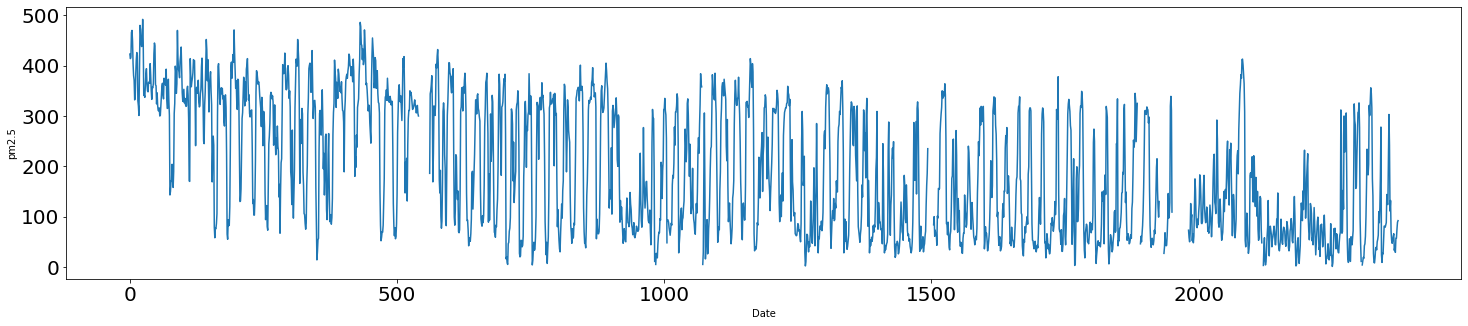

In [16]:
# Data Vissualization with line plot before handelling missing values
data1['pm25'].plot(kind='line', figsize=(25,5),xlabel='Date',ylabel='pm2.5', fontsize=20)

<AxesSubplot:>

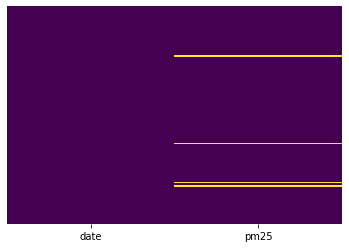

In [17]:
#Visualizing NaN values with heatmap plot
sns.heatmap(data1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
# Now data types are in required formate
data1.dtypes

date    datetime64[ns]
pm25           float64
dtype: object

In [20]:
# Replacing Nan values with interpolate method
data1['pm25'].interpolate(method='linear', inplace=True)
data1.head()

,date,pm25
0,2018-01-01 00:00:00,423.0
1,2018-01-01 01:00:00,414.0
2,2018-01-01 02:00:00,417.0
3,2018-01-01 03:00:00,466.0
4,2018-01-01 04:00:00,470.0


In [21]:
data1.drop_duplicates(subset ="date",keep = False, inplace = True)
data1.head()

,date,pm25
0,2018-01-01 00:00:00,423.0
1,2018-01-01 01:00:00,414.0
2,2018-01-01 02:00:00,417.0
3,2018-01-01 03:00:00,466.0
4,2018-01-01 04:00:00,470.0


In [22]:
data1.shape

(2374, 2)

In [23]:
data1.isna().sum()

date    0
pm25    0
dtype: int64

In [24]:
data1['pm25'].describe()

count    2374.000000
mean      191.874895
std       125.529241
min         1.000000
25%        76.612903
50%       163.000000
75%       316.000000
max       492.000000
Name: pm25, dtype: float64

In [26]:
import datetime as dt
data1['date'] =  pd.to_datetime(data1['date'],format='%d%b%Y:%H:%M:%S.%f') 
data1['date'].head()

0   2018-01-01 00:00:00
1   2018-01-01 01:00:00
2   2018-01-01 02:00:00
3   2018-01-01 03:00:00
4   2018-01-01 04:00:00
Name: date, dtype: datetime64[ns]

In [27]:
data1["year"] = data1.date.dt.strftime("%Y") # year extraction
data1["month"] = data1.date.dt.strftime("%b") # month extraction
data1["Day"] = data1.date.dt.strftime("%d") # Day extraction
data1['hour'] = data1['date'].dt.strftime("%H") # hour extraction
data1['dayofweek'] = data1['date'].dt.day_name()

In [28]:
data2 = data1.set_index('date')
data2.head()

,pm25,year,month,Day,hour,dayofweek
date,,,,,,
2018-01-01 00:00:00,423.0,2018,Jan,01,00,Monday
2018-01-01 01:00:00,414.0,2018,Jan,01,01,Monday
2018-01-01 02:00:00,417.0,2018,Jan,01,02,Monday
2018-01-01 03:00:00,466.0,2018,Jan,01,03,Monday
2018-01-01 04:00:00,470.0,2018,Jan,01,04,Monday


In [29]:
data2.describe()

,pm25
count,2374.000000
mean,191.874895
std,125.529241
min,1.000000
25%,76.612903
50%,163.000000
75%,316.000000
max,492.000000


In [30]:
data2["pm25"] = pd.to_numeric(data2["pm25"])

## Data Vissualization using different plots

### LINE PLOT
It gives tells components of the data.

<AxesSubplot:xlabel='Date', ylabel='pm2.5'>

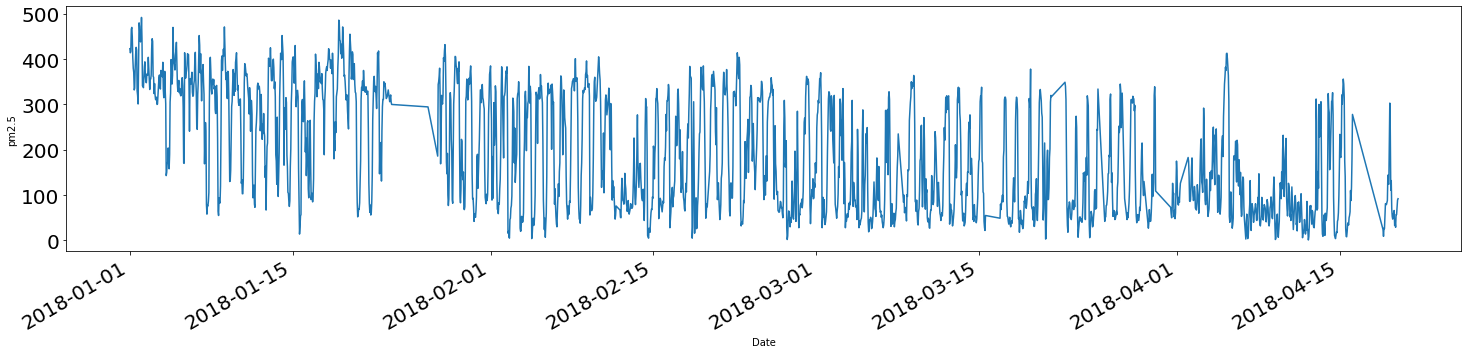

In [31]:
# Data Vissualization with line plot after impution of null values
data2['pm25'].plot(kind='line', figsize=(25,5),xlabel='Date',ylabel='pm2.5', fontsize=20)

### Line plot month vs pm25

<AxesSubplot:xlabel='month', ylabel='pm25'>

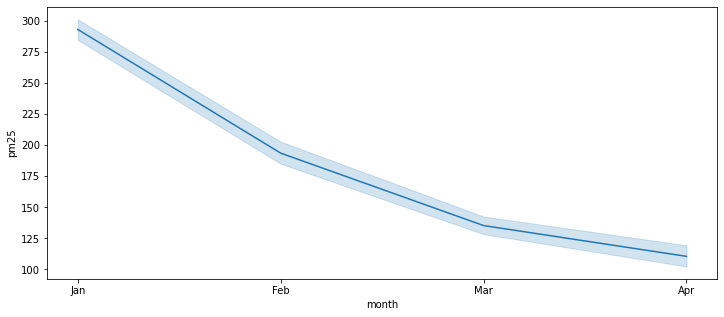

In [32]:
plt.figure(figsize=(12,5))
sns.lineplot(x="month",y="pm25",data=data2)

### Line plot hour vs pm25

<AxesSubplot:xlabel='hour', ylabel='pm25'>

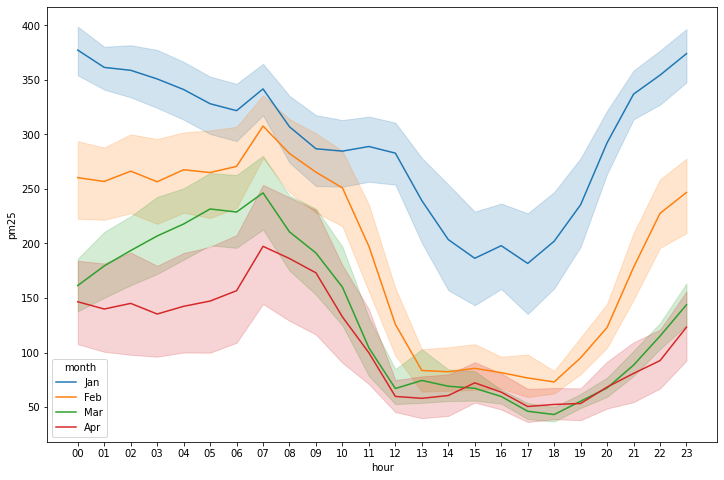

In [33]:
plt.figure(figsize=(12,8))
sns.lineplot(x="hour",y="pm25",hue="month",data=data2)

## Heat map plot for Data visualization

<AxesSubplot:xlabel='None-dayofweek', ylabel='month'>

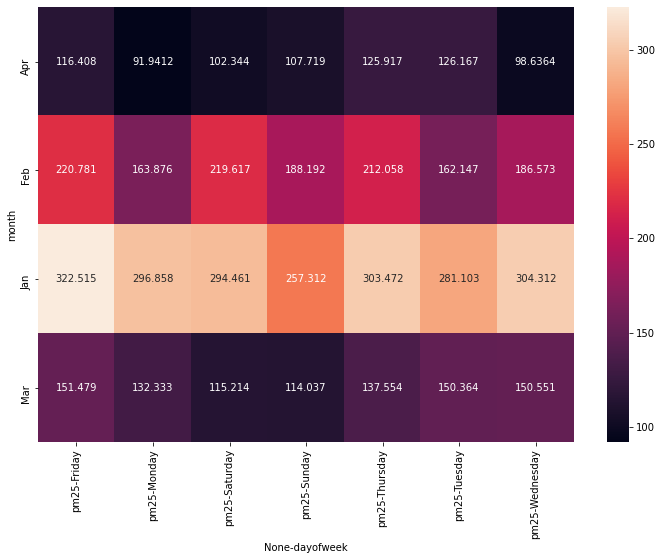

In [34]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap = pd.pivot_table(data1,values=['pm25'],index=["month"],columns=["dayofweek"],aggfunc="mean")
sns.heatmap(heatmap,annot=True,fmt="g")

### BOX PLOT 

#### Box plot pm25 vs hour

<AxesSubplot:xlabel='hour', ylabel='pm25'>

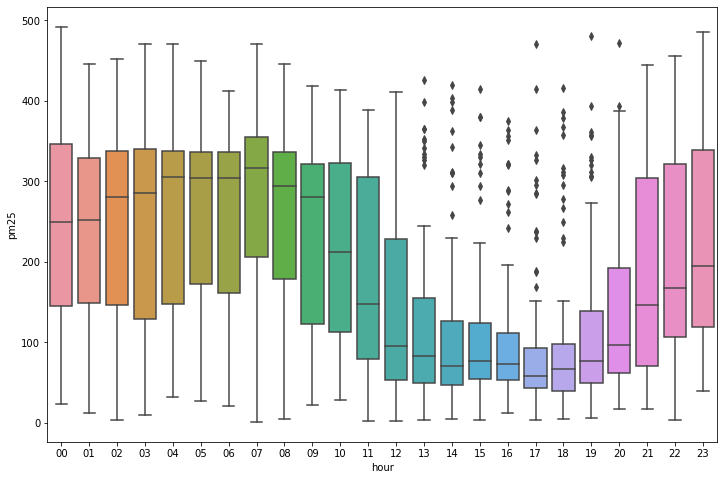

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x="hour",y="pm25",data=data2)

#### Box plot pm25 vs month

<AxesSubplot:xlabel='month', ylabel='pm25'>

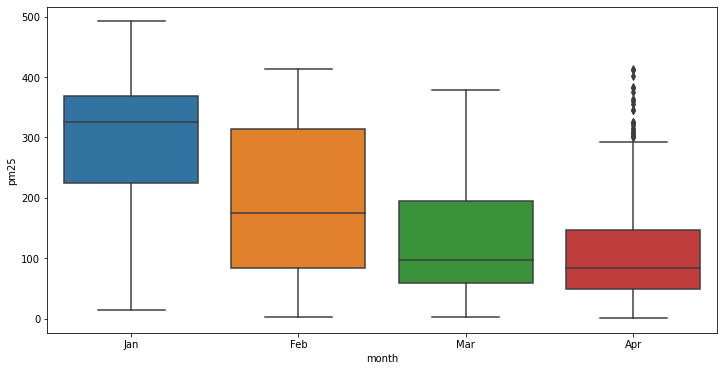

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x="month",y="pm25",data=data2)

#### Box plot pm25 vs day

<AxesSubplot:xlabel='Day', ylabel='pm25'>

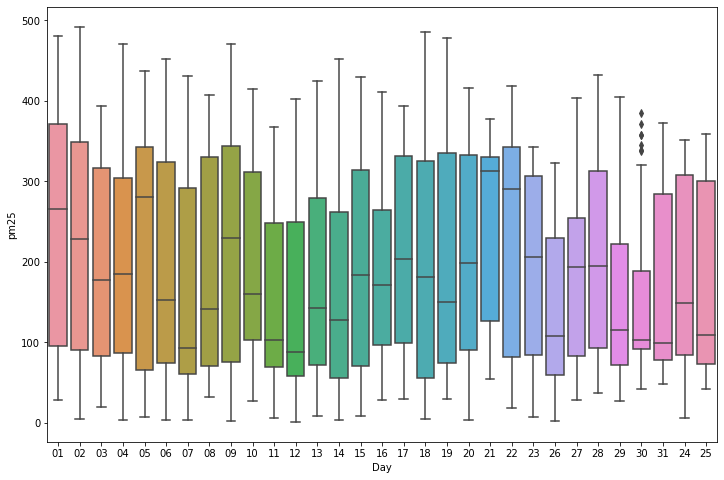

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Day",y="pm25",data=data2)

#### Box plot pm25 vs dayofweek

<AxesSubplot:xlabel='dayofweek', ylabel='pm25'>

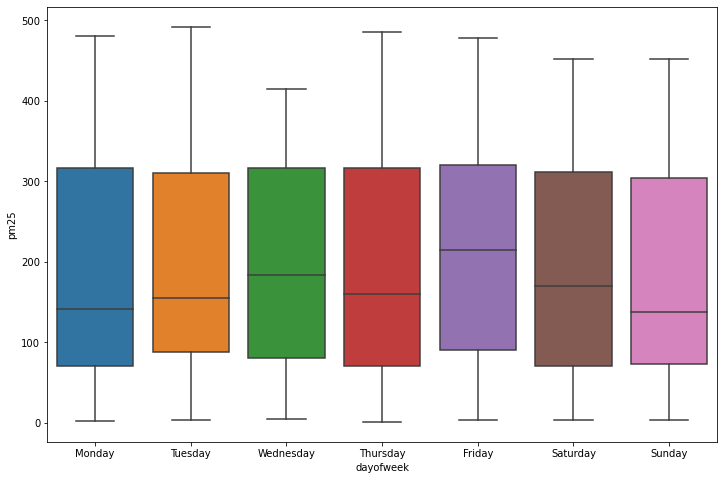

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x="dayofweek",y="pm25",data=data2)

###  LAG Plot

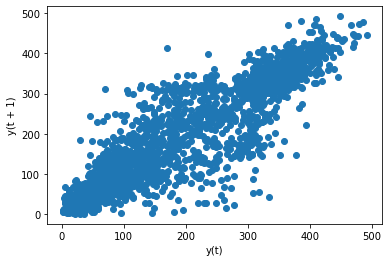

In [39]:
# From below Lag plot the strenght of variable with its own lagged values (lag=1) is little Strong-Possitive relationship 
from pandas.plotting import lag_plot
lag_plot(data2['pm25'], lag=1)
pyplot.show()

### Auto-correlation plot

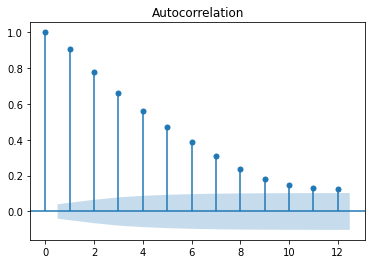

In [40]:
# From below ACF plot it gives significant-relationship b/w its own variable with its lagged value.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2['pm25'], lags=12)
pyplot.show()